In [2]:
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [3]:
from plotting import plot_trajectory

# Joint Space Trajectories

## Point-to-Point Motion

### Cubic Polynomial

\begin{align}
q(t) &= a_3 t^3 + a_2 t^2 + a_1 t + a_0 \\
\dot{q}(t)  &= 3 a_3 t^2 + 2 a_2 t + a_1 \\
\ddot{q}(t) &= 6 a_3 t + 2 a_2
\end{align}

\begin{align}
a_0 &= q_i \\
a_1 &= \dot{q}_i \\
a_3 t_f^3 + a_2 t_f^2 + a_1 t_f + a_0 &= q_f \\
3 a_3 t_f^2 + 2 a_2 t_f + a_1 &= \dot{q}_f
\end{align}

\begin{align}
\begin{pmatrix} q_i \\ q_f \\ \dot q_i \\ \dot q_f \end{pmatrix} =
\begin{pmatrix} 
  0 & 0 & 0 & 1 \\ 
  t^3 & t^2 & t & 1 \\ 
  0 & 0 & 1 & 0 \\ 
  3t^2 & 2t & 1 & 0
  \end{pmatrix} 
  \begin{pmatrix} a_3 \\ a_2 \\ a_1 \\ a_0 \end{pmatrix}
\end{align}

In [4]:
def cubic_trajectory(current_position, target_position, 
                     current_velocity, target_velocity,
                     duration_in_seconds):
    trajectories = []
    t = duration_in_seconds
    xs = linspace(0,t)
    for qi, qf, dqi, dqf in zip(current_position, target_position, 
                                current_velocity, target_velocity):
        A = np.array([[0.0,0.0,0.0,1.0],
                      [t**3, t**2, t, 1.],
                      [0.0, 0.0, 1.0, 0.0],
                      [3.0 * t**2, 2*t, 1.0, 0.0]])
        
        b = np.array([qi, qf, dqi, dqf])
        x = np.linalg.solve(A,b)        
        
        qs = np.polyval(x, xs)
        dqs = np.polyval([3. * x[0], 2. * x[1], x[2]], xs)
        ddqs = np.polyval([6. * x[0], 2. * x[1]], xs)

        trajectories.append((qs, dqs, ddqs))
    return trajectories

In [5]:
qi = [0,np.pi]
qf = [np.pi,0]
dqi = [0,0]
dqf = [0,0]
trajectories = cubic_trajectory(qi, qf, dqi, dqf, 50)

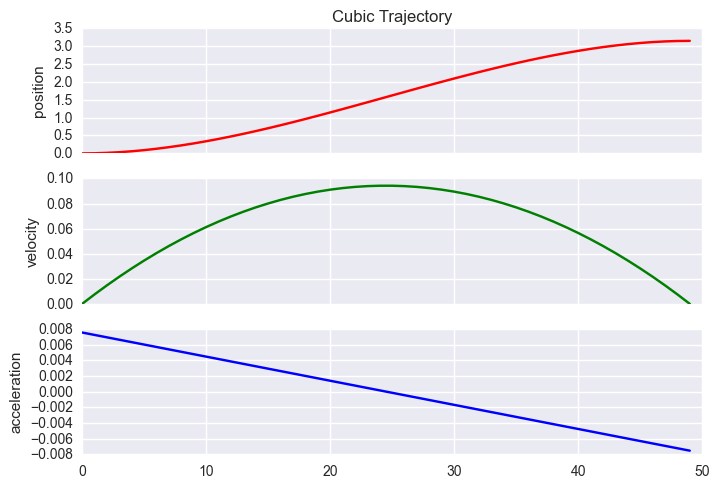

In [6]:
plot_trajectory(trajectories[0], iscubic=True)

### Cubic Polynomial

In [8]:
def quintic_trajectory(current_position, target_position, current_velocity,
                       target_velocity, current_acceleration,
                       target_acceleration, duration_in_seconds):
    trajectories = []
    t = duration_in_seconds
    xs = linspace(0, t)
    for qi, qf, dqi, dqf, ddqi, ddqf in zip(current_position, target_position, 
                                            current_velocity, target_velocity,
                                            current_acceleration, target_acceleration):
        A = np.array(
            [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 
             [t**5, t**4, t**3, t**2, t, 1.0],
             [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 
             [5. * t**4, 4. * t**3, 3. * t**2, 2. * t, 1., 0.0], 
             [0.0, 0.0, 0.0, 2.0, 0.0, 0.0], 
             [20. * t**3, 12. * t**2, 6. * t, 2., 0.0, 0.0]])

        b = np.array([qi, qf, dqi, dqf, ddqi, ddqf])
        x = np.linalg.solve(A, b)

        qs = np.polyval(x, xs)
        dqs = np.polyval([5. * x[0], 4. * x[1], 3. * x[2], 2. * x[3], x[4]], xs)
        ddqs = np.polyval([20. * x[0], 12. * x[1], 6. * x[2], 2. * x[3]], xs)

        trajectories.append((qs, dqs, ddqs))
    return trajectories

In [9]:
qi = [0,np.pi]
qf = [np.pi,0]
dqi = [0,0]
dqf = [0,0]
ddqi = [0,0]
ddqf = [0,0]
trajectories = quintic_trajectory(qi, qf, dqi, dqf, ddqi, ddqf, 50)

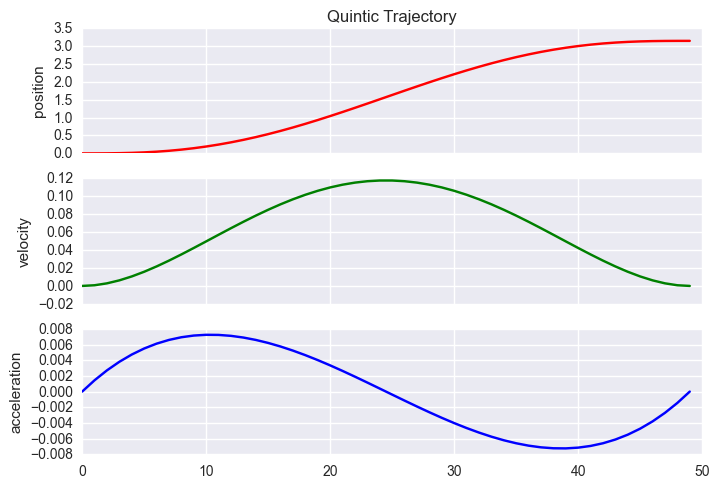

In [10]:
plot_trajectory(trajectories[0], iscubic=False)